<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/examples/multi_modal/openai_multi_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal LLM using OpenAI GPT-4V model for image reasoning

In this notebook, we show how to use OpenAI GPT4V MultiModal LLM class for image understanding/reasoning

In [ ]:
!pip install openai matplotlib

##  Use GPT4V to understand images from urls

In [ ]:
import os

OPENAI_API_TOKEN = ""  # Your OpenAI API token here
os.environ["OPENAI_API_TOKEN"] = OPENAI_API_TOKEN

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.multi_modal_llms.generic_utils import (
    load_image_urls,
)


image_urls = [
    "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg",
    "https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg",
    # "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    # "https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg",
]

image_documents = load_image_urls(image_urls)

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=300
)

response = openai_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg


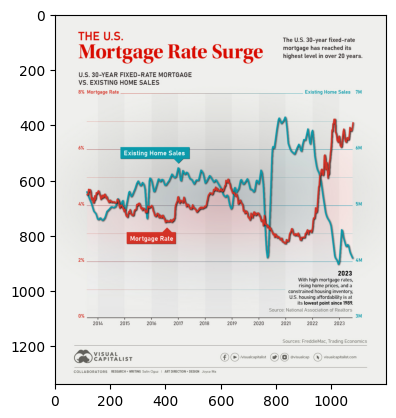

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg


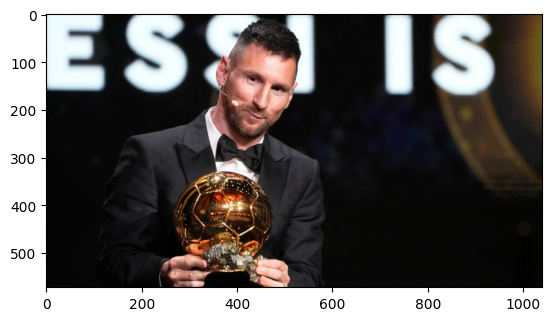

In [ ]:
img_response = requests.get(image_urls[1])
print(image_urls[1])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

In [ ]:
print(response)

1. The first image is a graphical representation showing the surge in US Mortgage Rates as of September 11. It likely contains charts or graphs with data points and possibly annotations to explain the trends and changes.

2. The second image appears to be related to sports and features what could be athletes in action, a scoreboard, or a highlight from a sports event. The exact content isn't clear without viewing the image, but the structure of the URL suggests it may be from a sports news coverage.


In [ ]:
response = openai_mm_llm.complete(
    prompt="is there any relationship between those images?",
    image_documents=image_documents,
)
print(response)

[{'type': 'text', 'text': 'is there any relationship between those images?'}, {'type': 'image_url', 'image_url': 'https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg'}, {'type': 'image_url', 'image_url': 'https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg'}]
[{'role': <MessageRole.USER: 'user'>, 'content': "[{'type': 'text', 'text': 'is there any relationship between those images?'}, {'type': 'image_url', 'image_url': 'https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg'}, {'type': 'image_url', 'image_url': 'https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg'}]"}]
Based on the provided text and image URLs, I can't determine the direct relationship between the two images as they appear to belong to different categories. The first image URL points to a visual concerning the surge in US mortgage rates, which is likely related to finance or the eco

##  Use GPT4V to understand images from local files

In [ ]:
from llama_index import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("./images_wiki").load_data()


response = openai_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

{'file_path': 'images_wiki/3.jpg', 'creation_date': '2023-11-06', 'last_modified_date': '2023-10-27', 'last_accessed_date': '2023-11-07'}


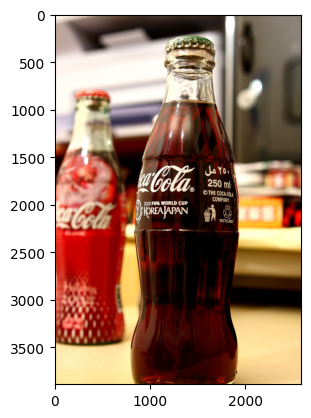

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("./images_wiki/3.jpg")
plt.imshow(img)

In [ ]:
print(response)

You are looking at a close-up image of a glass Coca-Cola bottle. The label on the bottle features the iconic Coca-Cola logo with additional text underneath it commemorating the 2002 FIFA World Cup hosted by Korea/Japan. The label also indicates that the bottle contains 250 ml of the product. In the background with a shallow depth of field, you can see the blurred image of another Coca-Cola bottle, emphasizing the focus on the one in the foreground. The overall lighting and detail provide a clear view of the bottle and its labeling.
